In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import Dataset

In [4]:
df=pd.read_csv("machine_event.csv")

In [5]:
df.head()

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,01/01/2015,S1F01085,0,0,7,407438,215630672,6,0,52,56,0
1,01/01/2015,S1F0166B,0,3,0,403174,61370680,6,0,0,0,0
2,01/01/2015,S1F01E6Y,0,0,0,237394,173295968,12,0,0,0,0
3,01/01/2015,S1F01JE0,0,0,0,410186,79694024,6,0,0,0,0
4,01/01/2015,S1F01R2B,0,0,3,313173,135970480,15,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      124494 non-null  object
 1   machine   124494 non-null  object
 2   event     124494 non-null  int64 
 3   feature1  124494 non-null  int64 
 4   feature2  124494 non-null  int64 
 5   feature3  124494 non-null  int64 
 6   feature4  124494 non-null  int64 
 7   feature5  124494 non-null  int64 
 8   feature6  124494 non-null  int64 
 9   feature7  124494 non-null  int64 
 10  feature8  124494 non-null  int64 
 11  feature9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe()

,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
count,124494.000000,124494.000000,124494.000000,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,9.940455,12.451524,260172.858025,1.223868e+08,14.222693,0.292528,1.741120,159.484762,0.438792
std,0.029167,185.747321,191.425623,99151.009852,7.045960e+07,15.943021,7.436924,22.908507,2179.657730,11.155386
min,0.000000,0.000000,0.000000,8.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,221452.000000,6.127675e+07,8.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,249799.500000,1.227957e+08,10.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,310266.000000,1.833084e+08,12.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,24929.000000,18701.000000,689161.000000,2.441405e+08,98.000000,832.000000,1666.000000,64968.000000,1248.000000


In [8]:
print(df.shape)
print(df.size)

(124494, 12)
1493928


In [9]:
#checking null/missed data
df.isnull().sum()

date        0
machine     0
event       0
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
feature9    0
dtype: int64

In [10]:
df.head(10)

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,01/01/2015,S1F01085,0,0,7,407438,215630672,6,0,52,56,0
1,01/01/2015,S1F0166B,0,3,0,403174,61370680,6,0,0,0,0
2,01/01/2015,S1F01E6Y,0,0,0,237394,173295968,12,0,0,0,0
3,01/01/2015,S1F01JE0,0,0,0,410186,79694024,6,0,0,0,0
4,01/01/2015,S1F01R2B,0,0,3,313173,135970480,15,0,0,0,0
5,01/01/2015,S1F01TD5,0,0,1,413535,68837488,6,0,41,0,0
6,01/01/2015,S1F01XDJ,0,0,0,402525,227721632,8,0,0,0,0
7,01/01/2015,S1F023H2,0,0,3,494462,141503600,19,16,1,0,24
8,01/01/2015,S1F02A0J,0,1,0,311869,8217840,14,0,0,0,0
9,01/01/2015,S1F02DZ2,0,323,164,407905,116440096,9,0,9,0,0


In [11]:
df.tail(10)

,date,machine,event,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
124484,11/02/2015,W1F0SJJ2,0,0,0,357421,47525320,12,0,0,0,0
124485,11/02/2015,Z1F0GB8A,0,0,0,357127,92823192,9,0,0,0,0
124486,11/02/2015,Z1F0GE1M,0,0,0,349826,222878704,10,0,0,0,0
124487,11/02/2015,Z1F0KJDS,0,0,0,358121,79883648,11,0,0,0,0
124488,11/02/2015,Z1F0KKN4,0,0,0,353525,218765712,9,0,0,0,0
124489,11/02/2015,Z1F0MA1S,0,0,0,353705,18310224,10,8,0,0,12
124490,11/02/2015,Z1F0Q8RT,0,107,13,332792,172556680,11,0,4,96,0
124491,11/02/2015,Z1F0QK05,0,0,0,350410,19029120,11,0,0,4832,0
124492,11/02/2015,Z1F0QL3N,0,0,0,358980,226953408,12,0,0,0,0
124493,11/02/2015,Z1F0QLC1,0,0,0,351431,17572840,10,0,0,0,0


In [12]:
df.isnull().sum()

date        0
machine     0
event       0
feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
feature9    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      124494 non-null  object
 1   machine   124494 non-null  object
 2   event     124494 non-null  int64 
 3   feature1  124494 non-null  int64 
 4   feature2  124494 non-null  int64 
 5   feature3  124494 non-null  int64 
 6   feature4  124494 non-null  int64 
 7   feature5  124494 non-null  int64 
 8   feature6  124494 non-null  int64 
 9   feature7  124494 non-null  int64 
 10  feature8  124494 non-null  int64 
 11  feature9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *

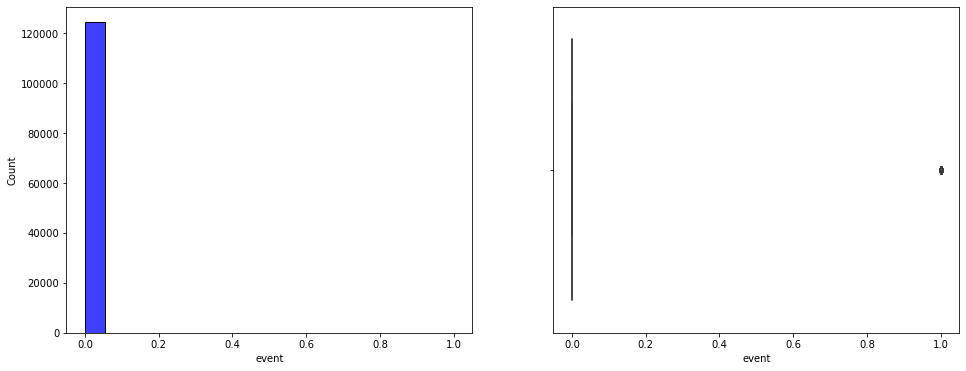

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(x='event', data=df, ax=ax1, color='blue')
sns.boxplot(x='event', data=df, ax=ax2)
plt.show()

In [16]:
#separate the other attributes from the predicting attribute
x = df.drop(['date','machine','event'],axis=1)
#separte the predicting attribute into Y for model training 
y = df['event']

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,0,7,407438,215630672,6,0,52,56,0
1,3,0,403174,61370680,6,0,0,0,0
2,0,0,237394,173295968,12,0,0,0,0
3,0,0,410186,79694024,6,0,0,0,0
4,0,3,313173,135970480,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
124489,0,0,353705,18310224,10,8,0,0,12
124490,107,13,332792,172556680,11,0,4,96,0
124491,0,0,350410,19029120,11,0,0,4832,0
124492,0,0,358980,226953408,12,0,0,0,0


In [19]:
from sklearn.feature_selection import mutual_info_regression

In [20]:
x.dtypes

feature1    int64
feature2    int64
feature3    int64
feature4    int64
feature5    int64
feature6    int64
feature7    int64
feature8    int64
feature9    int64
dtype: object

In [21]:
mutual_info_regression(x,y)

array([0.00000000e+00, 2.20979967e-03, 1.82725578e-03, 8.99282915e-04,
       0.00000000e+00, 2.00066150e-03, 1.37103150e-04, 1.31597695e-05,
       1.00864952e-03])

In [22]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp.columns=['importance']

In [23]:
imp.sort_values(by='importance',ascending=False)

,importance
feature9,0.004119
feature7,0.003127
feature2,0.001992
feature6,0.000989
feature4,0.000254
feature1,0.000000
feature3,0.000000
feature5,0.000000
feature8,0.000000


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
ml_model=RandomForestRegressor()

In [28]:
model=ml_model.fit(x_train,y_train)

In [29]:
y_pred=model.predict(x_test)

In [30]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
y_pred.shape

(31124,)

In [32]:
len(x_test)

31124

In [33]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pickle

In [35]:
file=open(r'C:\Users\Nurvita\Documents\Tugas Python/rf_randoom.pkl','wb')

In [36]:
pickle.dump(model,file)

In [39]:
model=open(r'C:\Users\Nurvita\Documents\Tugas Python/rf_randoom.pkl','rb')

In [40]:
forest=pickle.load(model)

In [41]:
forest.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])